In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

In [2]:
# Importing and scaling the data
dataset_train = pd.read_csv("gold-360train.csv",skiprows=[0])
#selecting the right column (we need all rows and column 1) : numpy array
training_set = dataset_train.iloc[:,1:2].values
print(dataset_train)
print(training_set)

      Month    Price  Change
0    Dec-91   361.73       -
1    Jan-92   354.45  -2.01%
2    Feb-92   353.91  -0.15%
3    Mar-92   344.34  -2.70%
4    Apr-92   338.62  -1.66%
..      ...      ...     ...
343  20-Jul  1846.51   6.60%
344  20-Aug  1968.63   6.61%
345  20-Sep  1921.92  -2.37%
346  20-Oct  1900.27  -1.13%
347  20-Nov  1866.30  -1.79%

[348 rows x 3 columns]
[[ 361.73]
 [ 354.45]
 [ 353.91]
 [ 344.34]
 [ 338.62]
 [ 337.24]
 [ 340.81]
 [ 352.72]
 [ 343.06]
 [ 345.43]
 [ 344.38]
 [ 335.02]
 [ 334.82]
 [ 329.01]
 [ 329.31]
 [ 330.08]
 [ 342.15]
 [ 367.18]
 [ 371.89]
 [ 392.19]
 [ 378.84]
 [ 355.28]
 [ 364.18]
 [ 373.83]
 [ 383.3 ]
 [ 386.88]
 [ 381.91]
 [ 384.13]
 [ 377.27]
 [ 381.43]
 [ 385.64]
 [ 385.49]
 [ 380.36]
 [ 391.58]
 [ 389.77]
 [ 384.39]
 [ 379.29]
 [ 378.55]
 [ 376.64]
 [ 382.12]
 [ 391.03]
 [ 385.22]
 [ 387.56]
 [ 386.23]
 [ 383.67]
 [ 383.06]
 [ 383.14]
 [ 385.31]
 [ 387.44]
 [ 399.45]
 [ 404.76]
 [ 396.21]
 [ 392.85]
 [ 391.93]
 [ 385.27]
 [ 383.47]
 [ 387.35]
 

In [3]:
# Feature scaling
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0,:])

[0.06169163]


In [4]:
#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(6,training_set_scaled.size):
    # appending the 6 previous prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_train.append(training_set_scaled[i-6:i, 0])
    # appending the 6th price to the list for i
    y_train.append(training_set_scaled[i, 0])
# transforming pandas lists to numpy arrays required for the RNN
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)

[[0.06169163 0.05744066 0.05712534 0.05153718 0.04819713 0.04739132]
 [0.05744066 0.05712534 0.05153718 0.04819713 0.04739132 0.04947593]
 [0.05712534 0.05153718 0.04819713 0.04739132 0.04947593 0.05643047]
 ...
 [0.78003562 0.8333129  0.85243059 0.8619544  0.92869113 1.        ]
 [0.8333129  0.85243059 0.8619544  0.92869113 1.         0.97272488]
 [0.85243059 0.8619544  0.92869113 1.         0.97272488 0.96008292]]


In [5]:
# Shaping/adding new dimensions to allow adding more indicators: from 2D to 3D
# 3 input arguments
# batch_size: number of observations
# timesteps: number of columns
# input_dim: number of predictors
X_train = np.reshape(X_train, [X_train.shape[0], X_train.shape[1], 1])
print(X_train)

[[[0.06169163]
  [0.05744066]
  [0.05712534]
  [0.05153718]
  [0.04819713]
  [0.04739132]]

 [[0.05744066]
  [0.05712534]
  [0.05153718]
  [0.04819713]
  [0.04739132]
  [0.04947593]]

 [[0.05712534]
  [0.05153718]
  [0.04819713]
  [0.04739132]
  [0.04947593]
  [0.05643047]]

 ...

 [[0.78003562]
  [0.8333129 ]
  [0.85243059]
  [0.8619544 ]
  [0.92869113]
  [1.        ]]

 [[0.8333129 ]
  [0.85243059]
  [0.8619544 ]
  [0.92869113]
  [1.        ]
  [0.97272488]]

 [[0.85243059]
  [0.8619544 ]
  [0.92869113]
  [1.        ]
  [0.97272488]
  [0.96008292]]]


In [6]:
#--------------------- Building RNN/LSTM model --------------------#
#Initializing the RNN

# independent variable is a sequence of layers: regression and no classification given the continuous output value
regressor = Sequential()

In [7]:
#------------------------------------------------------------------#
# Adding the first LSTM layer
#------------------------------------------------------------------#

# 3 inputs
# number of memory/LSTM units or neurons in each LSTM
# binary vb to indicate whether there will be further layers of LSTM added to teh model
# input shape (automatically takes teh first dimension so the reamining only needs to be specified)
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))

# adding Dropout regularization layers
# 1 input: amount of neurons to ignore in the layers
regressor.add(Dropout(0.2))


In [8]:
#------------------------------------------------------------------#
# Adding the second LSTM layer
#------------------------------------------------------------------#
# no input shape needed given that that is specified in the previous layer
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))


In [9]:
#------------------------------------------------------------------#
# Adding the third LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
#------------------------------------------------------------------#
# Adding the forth LSTM layer
#------------------------------------------------------------------#
regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))


In [11]:
#------------------------------------------------------------------#
# Adding the fifth LSTM layer
#------------------------------------------------------------------#
# note that this is the final LSTM layer, hence we change the binary argument to False
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
#------------------------------------------------------------------#
# Adding output layer to the RNN to make a fully connected NN
#------------------------------------------------------------------#
# one dimensional real output
regressor.add(Dense(units = 1))

In [13]:
#--------------------- Compiling the RNN model --------------------#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [14]:
#--------------------- Training RNN model --------------------#
#connecting the built regressor to the training model
regressor.fit(X_train, y_train, epochs = 120, batch_size = 6)

Epoch 1/120
57/57 [==============================] - 9s 14ms/step - loss: 0.0582
Epoch 2/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0084
Epoch 3/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0059
Epoch 4/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0053
Epoch 5/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0054
Epoch 6/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 7/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0056
Epoch 8/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0045
Epoch 9/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0046
Epoch 10/120
57/57 [==============================] - 1s 15ms/step - loss: 0.0053
Epoch 11/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0047
Epoch 12/120
57/57 [==============================] - 1s 14ms/step - loss: 0.0103
Epoch 13/120
57/57 [=====

In [15]:
#--------------------- Testing RNN model --------------------#
dataset_test = pd.read_csv("gold-360test.csv",skiprows=[0])
# actual stock prices
real_stock_price = dataset_test.iloc[:,1:2].values
# predicting the stock prices using X_test
# we need the original training data (vertical concatination 0, horizontal 1)
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
print(real_stock_price)

[[1858.42]
 [1866.98]
 [1808.17]
 [1718.23]
 [1760.04]
 [1850.26]
 [1834.57]
 [1807.84]
 [1785.28]
 [1775.14]
 [1776.85]
 [1821.76]]


In [16]:
# for the consistence of the model we need to have the same scaling on the test as on the training
# for the first test month we need the previous 6 months data from train
print("First month, when testing period begins",len(dataset_total)- len(dataset_test))
print("First month - 6 month",len(dataset_total)- len(dataset_test) - 6)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 6:].values

First month, when testing period begins 348
First month - 6 month 342


In [17]:
# reshaping,normalizing the inputs
inputs = inputs.reshape(-1,1)
# no longer fitting but just transforming
inputs = sc.transform(inputs)


In [18]:
#storing test data as we did in teh training
X_test = []
for i in range(6,inputs.size):
    X_test.append(inputs[i-6:i, 0])
X_test = np.array(X_test)
#adding extra dimension
X_test = np.reshape(X_test, [X_test.shape[0], X_test.shape[1], 1])

#obtaining predicted values
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

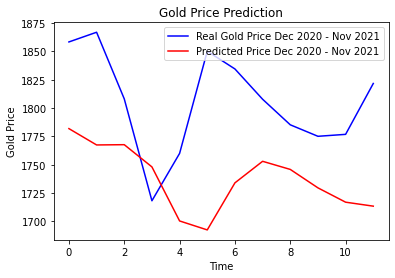

In [19]:
#--------------------- Visualizing the RNN model results--------------------#
plt.plot(real_stock_price, color = 'blue', label = "Real Gold Price Dec 2020 - Nov 2021")
plt.plot(predicted_stock_price, color = 'red', label = "Predicted Price Dec 2020 - Nov 2021")
plt.title("Gold Price Prediction")
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()
